<a href="https://colab.research.google.com/github/michel-wue/Seminar/blob/main/Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pytorch-tabnet
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 58.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 873.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 47.5 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.0.1+cu118
    Uninstalling torch-2.0.1+cu118:
      Successfully uninstalled torch-2.0.1+cu118
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.0.2+cu118 requires torch==2.0.1, but you have torch 1.13.1 whi

In [ ]:
from pytorch_tabnet.tab_model import TabNetClassifier

In [ ]:
#!pip install pandas-profiling

In [ ]:
import requests as r
import pandas as pd
from pandas import json_normalize
import re
from google.colab import drive
import datetime
from os import times
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from datetime import datetime, timedelta
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import dask.dataframe as dd
#import pandas_profiling


In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
play_data = pd.read_csv(
    '/content/drive/MyDrive/seminar/full_data3.csv'
)

,pred,actual_values
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
70972,0,0
70973,0,0
70974,0,0
70975,0,0


In [ ]:
import pandas as pd
from datetime import timedelta
play_data['clock'] = play_data['clock'].apply(lambda x: timedelta(days=int(x.split()[0]), hours=int(x.split()[2].split(':')[0]), minutes=int(x.split()[2].split(':')[1]), seconds=int(x.split()[2].split(':')[2])).total_seconds() / 60.0)
play_data['time_remaining'] = np.where(play_data['quarter'] == 1, play_data['clock'] + 45, play_data['clock'])
play_data['time_remaining'] = np.where(play_data['quarter'] == 2, play_data['clock'] + 30, play_data['time_remaining'])
play_data['time_remaining'] = np.where(play_data['quarter'] == 3, play_data['clock'] + 15, play_data['time_remaining'])
play_data['time_remaining'] = np.where(play_data['quarter'] == 4, play_data['clock'], play_data['time_remaining'])
play_data['time_remaining'] = np.where(play_data['quarter'] == 5, play_data['clock'], play_data['time_remaining'])
play_data.loc[play_data['Winner'] == 'Home', 'Winner'] = 1
play_data.loc[play_data['Winner'] == 'Away', 'Winner'] = 0
train_val_df = play_data.iloc[:285610, :]
test_df = play_data.iloc[285610:356587, :]
valid_df = train_val_df.iloc[:7170, :]
train_df = train_val_df.iloc[7170:285610, :]
test_df = test_df.drop_duplicates()
valid_df = valid_df.drop_duplicates()
test_df = test_df.drop_duplicates()
# Print the updated DataFrame
print(play_data)


           GameID         playID  awayScore  homeScore  scoreValue  \
0       400951620    40095162037          0          0           0   
1       400951620    40095162052          0          0           0   
2       400951620    40095162073          0          0           0   
3       400951620   400951620102          0          0           0   
4       400951620   400951620124          0          0           0   
...           ...            ...        ...        ...         ...   
356583  401437952  4014379523753         20         16           0   
356584  401437952  4014379523764         20         16           0   
356585  401437952  4014379523774         20         16           0   
356586  401437952  4014379523812         20         16           0   
356587  401437952  4014379523833         20         16           0   

        statYardage  quarter      clock          type_text team_play  ...  \
0                 0        1  15.000000            Kickoff       cin  ...   
1    

In [ ]:
print(play_data)

           GameID         playID  awayScore  homeScore  scoreValue  \
0       400951620    40095162037          0          0           0   
1       400951620    40095162052          0          0           0   
2       400951620    40095162073          0          0           0   
3       400951620   400951620102          0          0           0   
4       400951620   400951620124          0          0           0   
...           ...            ...        ...        ...         ...   
356583  401437952  4014379523753         20         16           0   
356584  401437952  4014379523764         20         16           0   
356585  401437952  4014379523774         20         16           0   
356586  401437952  4014379523812         20         16           0   
356587  401437952  4014379523833         20         16           0   

        statYardage  quarter      clock          type_text team_play  ...  \
0                 0        1  15.000000            Kickoff       cin  ...   
1    

In [ ]:
import numpy as np

play_data['time_remaining'] = np.where(play_data['quarter'] == 1, play_data['clock'] + 45, play_data['clock'])
play_data['time_remaining'] = np.where(play_data['quarter'] == 2, play_data['clock'] + 30, play_data['time_remaining'])
play_data['time_remaining'] = np.where(play_data['quarter'] == 3, play_data['clock'] + 15, play_data['time_remaining'])
play_data['time_remaining'] = np.where(play_data['quarter'] == 4, play_data['clock'], play_data['time_remaining'])
play_data['time_remaining'] = np.where(play_data['quarter'] == 5, play_data['clock'], play_data['time_remaining'])


In [ ]:
print(play_data[play_data['quarter'] == 2])

           GameID         playID  awayScore  homeScore  scoreValue  \
40      400951620  4009516201016          3          0           0   
41      400951620  4009516201037          3          0           0   
42      400951620  4009516201056          3          3           3   
43      400951620  4009516201075          3          3           0   
44      400951620  4009516201090          3          3           0   
...           ...            ...        ...        ...         ...   
356506  401437952  4014379521919          3          9           0   
356507  401437952  4014379521935          3          9           0   
356508  401437952  4014379521950          3          9           0   
356509  401437952  4014379521986          6          9           3   
356510  401437952  4014379522005          6          9           0   

        statYardage  quarter      clock        type_text team_play  ...  \
40               -5        2  15.000000             Rush       cin  ...   
41       

In [ ]:
play_data.loc[play_data['Winner'] == 'Home', 'Winner'] = 1
play_data.loc[play_data['Winner'] == 'Away', 'Winner'] = 0

           GameID         playID  awayScore  homeScore  scoreValue  \
0       400951620    40095162037          0          0           0   
1       400951620    40095162052          0          0           0   
2       400951620    40095162073          0          0           0   
3       400951620   400951620102          0          0           0   
4       400951620   400951620124          0          0           0   
...           ...            ...        ...        ...         ...   
356583  401437952  4014379523753         20         16           0   
356584  401437952  4014379523764         20         16           0   
356585  401437952  4014379523774         20         16           0   
356586  401437952  4014379523812         20         16           0   
356587  401437952  4014379523833         20         16           0   

        statYardage  quarter      clock          type_text team_play  ...  \
0                 0        1  15.000000            Kickoff       cin  ...   
1    

In [ ]:

356587*0.8

285269.60000000003

In [ ]:
print(play_data)

           GameID         playID  awayScore  homeScore  scoreValue  \
0       400951620    40095162037          0          0           0   
1       400951620    40095162052          0          0           0   
2       400951620    40095162073          0          0           0   
3       400951620   400951620102          0          0           0   
4       400951620   400951620124          0          0           0   
...           ...            ...        ...        ...         ...   
356583  401437952  4014379523753         20         16           0   
356584  401437952  4014379523764         20         16           0   
356585  401437952  4014379523774         20         16           0   
356586  401437952  4014379523812         20         16           0   
356587  401437952  4014379523833         20         16           0   

        statYardage  quarter      clock          type_text team_play  ...  \
0                 0        1  15.000000            Kickoff       cin  ...   
1    

In [ ]:
train_val_df = play_data.iloc[:285610, :]
test_df = play_data.iloc[285610:356587, :]


In [ ]:
train_val_df

In [ ]:
test_df

,GameID,playID,awayScore,homeScore,scoreValue,statYardage,quarter,clock,type_text,team_play,...,end_yardsToEndzone,season,week,Winner,Home_teamname,Away_teamname,elo_score_away,elo_score_home,attendence,time_remaining
285610,401326451,40132645141,0,0,0,22,1,15.000000,Kickoff Return (Offense),ind,...,90,2021,9,1,ind,nyj,1342.19,1543.99,0.945921,60.000000
285611,401326451,40132645174,0,0,0,12,1,14.916667,Pass Reception,nyj,...,78,2021,9,1,ind,nyj,1342.19,1543.99,0.945921,59.916667
285612,401326451,40132645198,0,0,0,0,1,14.266667,Pass Reception,nyj,...,78,2021,9,1,ind,nyj,1342.19,1543.99,0.945921,59.266667
285613,401326451,401326451122,0,0,0,11,1,13.550000,Pass Reception,nyj,...,67,2021,9,1,ind,nyj,1342.19,1543.99,0.945921,58.550000
285614,401326451,401326451146,0,0,0,0,1,12.783333,Pass Incompletion,nyj,...,67,2021,9,1,ind,nyj,1342.19,1543.99,0.945921,57.783333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356582,401437952,4014379523733,20,16,0,0,4,2.000000,Two-minute warning,det,...,15,2022,18,0,gb,det,1485.30,1557.21,0.964833,2.000000
356583,401437952,4014379523753,20,16,0,2,4,2.000000,Rush,det,...,15,2022,18,0,gb,det,1485.30,1557.21,0.964833,2.000000
356584,401437952,4014379523764,20,16,0,0,4,1.250000,Timeout,det,...,15,2022,18,0,gb,det,1485.30,1557.21,0.964833,1.250000
356585,401437952,4014379523774,20,16,0,9,4,1.233333,Pass Reception,det,...,6,2022,18,0,gb,det,1485.30,1557.21,0.964833,1.233333


NameError: ignored

In [ ]:
train_val_df = play_data.iloc[:285610, :]
test_df = play_data.iloc[285610:356587, :]
valid_df = train_val_df.iloc[:7170, :]
train_df = train_val_df.iloc[7170:285610, :]
test_df = test_df.drop_duplicates()
valid_df = valid_df.drop_duplicates()
test_df = test_df.drop_duplicates()


In [ ]:
train_df

,GameID,playID,awayScore,homeScore,scoreValue,statYardage,quarter,clock,type_text,team_play,...,end_yardsToEndzone,season,week,Winner,Home_teamname,Away_teamname,elo_score_away,elo_score_home,attendence,time_remaining
7170,400791628,40079162836,0,0,0,0,1,15.000000,Kickoff,hou,...,100,2015,2,1,car,hou,1481.73,1551.73,0.992898,60.000000
7171,400791628,40079162851,0,0,0,0,1,15.000000,Pass Incompletion,car,...,80,2015,2,1,car,hou,1481.73,1551.73,0.992898,60.000000
7172,400791628,40079162873,0,0,0,0,1,14.950000,Pass Incompletion,car,...,80,2015,2,1,car,hou,1481.73,1551.73,0.992898,59.950000
7173,400791628,40079162895,0,0,0,-5,1,14.883333,Penalty,car,...,85,2015,2,1,car,hou,1481.73,1551.73,0.992898,59.883333
7174,400791628,400791628118,0,0,0,5,1,14.883333,Penalty,car,...,80,2015,2,1,car,hou,1481.73,1551.73,0.992898,59.883333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285605,401326450,4013264504392,17,20,0,-8,4,1.016667,Sack,nyg,...,80,2021,8,1,kc,nyg,1411.67,1584.06,0.999479,1.016667
285606,401326450,4013264504411,17,20,0,0,4,0.650000,Pass Incompletion,nyg,...,80,2021,8,1,kc,nyg,1411.67,1584.06,0.999479,0.650000
285607,401326450,4013264504433,17,20,0,0,4,0.566667,Fumble Recovery (Own),nyg,...,15,2021,8,1,kc,nyg,1411.67,1584.06,0.999479,0.566667
285608,401326450,4013264504469,17,20,0,-1,4,0.416667,Rush,kc,...,16,2021,8,1,kc,nyg,1411.67,1584.06,0.999479,0.416667


In [ ]:
test_df = test_df.drop_duplicates()
valid_df = valid_df.drop_duplicates()
test_df = test_df.drop_duplicates()



,GameID,playID,awayScore,homeScore,scoreValue,statYardage,quarter,clock,type_text,team_play,...,end_yardsToEndzone,season,week,Winner,Home_teamname,Away_teamname,elo_score_away,elo_score_home,attendence,time_remaining
288358,401326471,401326471142,0,0,0,0,1,13.283333,Pass Incompletion,ten,...,70,2021,10,0,ten,no,1627.96,1638.96,1.003919,58.283333
288359,401326471,401326471164,0,0,0,0,1,13.200000,Punt,ten,...,66,2021,10,0,ten,no,1627.96,1638.96,1.003919,58.200000
288360,401326471,401326471182,0,0,0,1,1,13.083333,Rush,no,...,65,2021,10,0,ten,no,1627.96,1638.96,1.003919,58.083333
288361,401326471,401326471203,0,0,0,10,1,12.533333,Pass Reception,no,...,55,2021,10,0,ten,no,1627.96,1638.96,1.003919,57.533333
288362,401326471,401326471227,0,0,0,8,1,12.050000,Pass Reception,no,...,47,2021,10,0,ten,no,1627.96,1638.96,1.003919,57.050000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356583,401437952,4014379523753,20,16,0,2,4,2.000000,Rush,det,...,15,2022,18,1,gb,det,1485.30,1557.21,0.964833,2.000000
356584,401437952,4014379523764,20,16,0,0,4,1.250000,Timeout,det,...,15,2022,18,1,gb,det,1485.30,1557.21,0.964833,1.250000
356585,401437952,4014379523774,20,16,0,9,4,1.233333,Pass Reception,det,...,6,2022,18,1,gb,det,1485.30,1557.21,0.964833,1.233333
356586,401437952,4014379523812,20,16,0,-1,4,0.550000,Rush,det,...,7,2022,18,1,gb,det,1485.30,1557.21,0.964833,0.550000


In [ ]:
print(type(play_data['GameID'][0]))

<class 'numpy.int64'>


           GameID         playID  awayScore  homeScore  scoreValue  \
117284  400951815  4009518154048         33          8           0   
79250   400874728   400874728978          0         10           0   
260759  401220152  4012201522350          3         20           0   
342700  401437878   401437878349          0          0           0   
41221   400791508  4007915082578         16         10           0   
...           ...            ...        ...        ...         ...   
86098   400874540  4008745403913         30         16           0   
4098    400791555   400791555358          0          7           0   
84841   400874716  4008747163561         23         12           0   
44222   400791617  4007916172881          9         14           0   
41687   400791531  4007915312174         17         17           0   

        statYardage  quarter      clock                   type_text team_play  \
117284            0        4   0.000000                 End of Game    NoTeam 

In [ ]:
cardinality_cols = ['type_text', 'team_play', 'start_down', 'end_down', 'season', 'week', 'Home_teamname', 'Away_teamname']
numerical_cols = ['GameID', 'playID', 'awayScore', 'homeScore', 'scoreValue', 'statYardage', 'quarter', 'clock', 'start_distance', 'start_yardlinie', 'start_yardsToEndzone', 'end_distance', 'end_yardlinie', 'end_yardsToEndzone', 'elo_score_away', 'elo_score_home', 'attendence', 'time_remaining']

['GameID', 'playID', 'awayScore', 'homeScore', 'scoreValue', 'statYardage', 'quarter', 'clock', 'start_distance', 'start_yardlinie', 'start_yardsToEndzone', 'end_distance', 'end_yardlinie', 'end_yardsToEndzone', 'elo_score_away', 'elo_score_home', 'attendence', 'time_remaining']
['type_text', 'team_play', 'start_down', 'end_down', 'season', 'week', 'Home_teamname', 'Away_teamname']


In [ ]:
# Preprocessing numerical columns
numerical_transformer = StandardScaler()

# Preprocessing categorical columns
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle both preprocessors
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_cols),  # Include numerical transformer
    ('cat', categorical_transformer, cardinality_cols)
])

In [ ]:
print(numerical_cols)
print(cardinality_cols)

['GameID', 'playID', 'awayScore', 'homeScore', 'scoreValue', 'statYardage', 'quarter', 'clock', 'start_distance', 'start_yardlinie', 'start_yardsToEndzone', 'end_distance', 'end_yardlinie', 'end_yardsToEndzone', 'elo_score_away', 'elo_score_home', 'attendence', 'time_remaining']
['type_text', 'team_play', 'start_down', 'end_down', 'season', 'week', 'Home_teamname', 'Away_teamname']


In [ ]:
import numpy as np

unique_values = np.unique(y_valid)
print(unique_values)
y_valid = y_valid.astype(int)

[0 1]


In [ ]:
X_train.to_csv('/content/drive/MyDrive/seminar/Train_data', index=False)

In [ ]:
#dask_df = play_data

# Erstelle den Pandas Profiling-Bericht
#report = pandas_profiling.ProfileReport(dask_df)

# Save the report as an HTML file
#report.to_file('/content/drive/MyDrive/seminar/profil_report_data_train.html')

In [ ]:
#play_data[(play_data['GameID']==400951620) & (play_data['playID']==400951620268)]#400951620	400951620268

In [ ]:
value_counts = y_valid.value_counts()

# Print the counts
print(value_counts)

NameError: ignored

In [ ]:
122931/(103526+122931)

0.5428447784789165

In [ ]:
X_train

,GameID,playID,awayScore,homeScore,scoreValue,statYardage,quarter,clock,type_text,team_play,...,end_yardlinie,end_yardsToEndzone,season,week,Home_teamname,Away_teamname,elo_score_away,elo_score_home,attendence,time_remaining
12340,400791701,4007917014003,37,17,0,5,4,1.566667,Penalty,tb,...,86,14,2015,4,tb,car,1572.20,1354.03,0.873002,1.566667
123579,400951647,4009516471969,7,14,0,3,3,15.000000,Rush,cle,...,28,72,2017,14,cle,gb,1502.86,1227.49,1.000000,30.000000
258136,401220270,401220270708,3,0,0,9,1,3.166667,Pass Reception,wsh,...,13,87,2020,15,wsh,sea,1582.35,1481.80,0.000000,48.166667
292770,401326493,4013264931466,10,10,0,4,2,6.516667,Rush,tb,...,82,18,2021,11,tb,nyg,1431.18,1623.83,0.997190,36.516667
140824,401030794,4010307942232,3,3,0,5,3,12.316667,Rush,ten,...,12,12,2018,3,jax,ten,1484.10,1577.74,0.943367,27.316667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125326,400951652,4009516522554,10,10,0,0,3,7.533333,Kickoff,sea,...,25,75,2017,14,jax,sea,1623.06,1536.24,0.949497,22.533333
306884,401326581,4013265813667,20,19,0,0,4,0.416667,Pass Incompletion,bal,...,34,66,2021,17,bal,stl,1630.31,1535.22,0.994106,0.416667
155062,401030816,4010308161955,3,6,0,7,3,15.000000,Rush,nyj,...,68,68,2018,9,mia,nyj,1417.33,1434.31,1.011827,30.000000
120699,400951684,4009516841478,6,0,0,0,2,6.433333,Kickoff,ne,...,25,75,2017,13,buf,ne,1730.80,1495.55,0.956409,36.433333


           GameID         playID  awayScore  homeScore  scoreValue  \
0       400951620    40095162037          0          0           0   
1       400951620    40095162052          0          0           0   
2       400951620    40095162073          0          0           0   
3       400951620   400951620102          0          0           0   
4       400951620   400951620124          0          0           0   
...           ...            ...        ...        ...         ...   
356583  401437952  4014379523753         20         16           0   
356584  401437952  4014379523764         20         16           0   
356585  401437952  4014379523774         20         16           0   
356586  401437952  4014379523812         20         16           0   
356587  401437952  4014379523833         20         16           0   

        statYardage  quarter      clock          type_text team_play  ...  \
0                 0        1  15.000000            Kickoff       cin  ...   
1    

In [ ]:
from sklearn.metrics import confusion_matrix
import xgboost as xgb
#xgb_model = xgb.XGBClassifier(eval_metric=['error', 'auc'], early_stopping_rounds=15, tree_method='gpu_hist', predictor='gpu_predictor')
xgb_model = xgb.XGBClassifier(eval_metric=['error', 'auc'], early_stopping_rounds=15)
# Train-validation-test split
# Train-test split
y_train_xgb = train_df['Winner']
y_valid_xgb = valid_df['Winner']
y_test_xgb = test_df['Winner']
X_train_xgb = train_df.drop('Winner', axis=1)
X_valid_xgb = valid_df.drop('Winner', axis=1)
X_test_xgb = test_df.drop('Winner', axis=1)

# Separate target from predictors
# y = data['Winner']
# X = data.drop('Winner', axis=1)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=0)
y_valid_xgb = y_valid_xgb.astype(int)
y_train_xgb = y_train_xgb.astype(int)
y_test_xgb = y_test_xgb.astype(int)
cardinality_cols = ['GameID','type_text', 'team_play', 'start_down', 'end_down', 'season', 'week', 'Home_teamname', 'Away_teamname']
numerical_cols = ['awayScore', 'homeScore', 'scoreValue', 'statYardage', 'quarter', 'clock', 'start_distance', 'start_yardlinie', 'start_yardsToEndzone', 'end_distance', 'end_yardlinie', 'end_yardsToEndzone', 'elo_score_away', 'elo_score_home', 'attendence', 'time_remaining']

# Preprocessing for numerical columns
scaler = StandardScaler()
X_train_numerical_xgb = scaler.fit_transform(X_train_xgb[numerical_cols])
X_valid_numerical_xgb = scaler.transform(X_valid_xgb[numerical_cols])
X_test_numerical_xgb = scaler.transform(X_test_xgb[numerical_cols])
#X_train_id_xgb = X_train_xgb[id_cols]
#X_valid_id_xgb = X_valid_xgb[id_cols]
#X_test_id_xgb = X_test_xgb[id_cols]
# Preprocessing for categorical columns
encoder = OneHotEncoder(handle_unknown='ignore')
X_train_categorical_xgb = encoder.fit_transform(X_train_xgb[cardinality_cols]).toarray()
X_valid_categorical_xgb = encoder.transform(X_valid_xgb[cardinality_cols]).toarray()
X_test_categorical_xgb = encoder.transform(X_test_xgb[cardinality_cols]).toarray()

# Concatenate the preprocessed numerical and categorical data
X_train_processed_xgb = np.concatenate([X_train_numerical_xgb, X_train_categorical_xgb], axis=1)
X_valid_processed_xgb = np.concatenate([X_valid_numerical_xgb, X_valid_categorical_xgb], axis=1)
X_test_processed_xgb = np.concatenate([X_test_numerical_xgb, X_test_categorical_xgb], axis=1)


# Fit the model
xgb_model.fit(
    X=X_train_processed_xgb,
    y=y_train_xgb,
    eval_set=[(X_valid_processed_xgb, y_valid_xgb)],
    verbose=True
)


# Make predictions on the test data
preds_test_xgb = xgb_model.predict(X_test_processed_xgb)


accuracy_test_xgb = accuracy_score(y_test_xgb, preds_test_xgb)
precision_test_xgb = precision_score(y_test_xgb, preds_test_xgb)
recall_test_xgb = recall_score(y_test_xgb, preds_test_xgb)
f1_test_xgb = f1_score(y_test_xgb, preds_test_xgb)
auc_test_xgb = roc_auc_score(y_test_xgb, preds_test_xgb)
cm_test_xgb = confusion_matrix(y_test_xgb, preds_test_xgb)
cm_str_test_xgb = np.array2string(cm_test_xgb, separator=', ')


print("\nTest Set Metrics:")
print("Accuracy:", accuracy_test_xgb)
print("Precision:", precision_test_xgb)
print("Recall:", recall_test_xgb)
print("F1 Score:", f1_test_xgb)
print("AUC:", auc_test_xgb)
print("Confusion Matrix:\n", cm_str_test_xgb)







In [ ]:
xgb_boost_pred = pd.DataFrame({'pred': preds_test_xgb, 'actual_values': y_test_xgb})
xgb_boost_pred.to_csv('/content/drive/MyDrive/seminar/xgb_pred.csv', index=False)

In [ ]:
 [[28087, 10922],
 [ 9397, 22571]]

0.7285317778998831


In [ ]:
#tn = TabNetClassifier(verbose=1, seed=42,device_name='cuda')
tn = TabNetClassifier(verbose=1, seed=42)
# Load dataset
data = play_data

# Separate target from predictors
y = data['Winner']
X = data.drop('Winner', axis=1)

# Train-test split
y_train_tn = train_df['Winner']
y_valid_tn = valid_df['Winner']
y_test_tn = test_df['Winner']
X_train_tn = train_df.drop('Winner', axis=1)
X_valid_tn = valid_df.drop('Winner', axis=1)
X_test_tn = test_df.drop('Winner', axis=1)

# Separate target from predictors
# y = data['Winner']
# X = data.drop('Winner', axis=1)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=0)
y_valid_tn = y_valid_tn.astype(int)
y_train_tn = y_train_tn.astype(int)
y_test_tn = y_test_tn.astype(int)
cardinality_cols = ['type_text', 'team_play', 'start_down', 'end_down', 'season', 'week', 'Home_teamname', 'Away_teamname']
numerical_cols = ['awayScore', 'homeScore', 'scoreValue', 'statYardage', 'quarter', 'clock', 'start_distance', 'start_yardlinie', 'start_yardsToEndzone', 'end_distance', 'end_yardlinie', 'end_yardsToEndzone', 'elo_score_away', 'elo_score_home', 'attendence', 'time_remaining']
id_cols=['GameID']
# Preprocessing for numerical columns
scaler = StandardScaler()
X_train_numerical_tn = scaler.fit_transform(X_train_tn[numerical_cols])
X_valid_numerical_tn = scaler.transform(X_valid_tn[numerical_cols])
X_test_numerical_tn = scaler.transform(X_test_tn[numerical_cols])
X_train_id_tn = X_train_tn[id_cols]
X_valid_id_tn = X_valid_tn[id_cols]
X_test_id_tn = X_test_tn[id_cols]
# Preprocessing for categorical columns
encoder = OneHotEncoder(handle_unknown='ignore')
X_train_categorical_tn = encoder.fit_transform(X_train_tn[cardinality_cols]).toarray()
X_valid_categorical_tn = encoder.transform(X_valid_tn[cardinality_cols]).toarray()
X_test_categorical_tn = encoder.transform(X_test_tn[cardinality_cols]).toarray()

# Concatenate the preprocessed numerical and categorical data
X_train_processed_tn = np.concatenate([X_train_numerical_tn, X_train_categorical_tn, X_train_id_tn], axis=1)
X_valid_processed_tn = np.concatenate([X_valid_numerical_tn, X_valid_categorical_tn,X_valid_id_tn], axis=1)
X_test_processed_tn = np.concatenate([X_test_numerical_tn, X_test_categorical_tn,X_test_id_tn], axis=1)

# Preprocess the raw training data and fit the model
tn.fit(
    X_train=X_train_processed_tn,
    y_train=y_train_tn,
    patience=15,
    max_epochs=32,
    eval_set=[(X_valid_processed_tn, y_valid_tn)],
    eval_metric=['accuracy', 'auc'],
    batch_size=16
)

# Preprocess the raw validation data and make predictions
preds_test_tn = tn.predict(X_test_processed_tn)

accuracy_test_tn = accuracy_score(y_test_tn, preds_test_tn)
precision_test_tn = precision_score(y_test_tn, preds_test_tn)
recall_test_tn = recall_score(y_test_tn, preds_test_tn)
f1_test_tn = f1_score(y_test_tn, preds_test_tn)
auc_test_tn = roc_auc_score(y_test_tn, preds_test_tn)
cm_test_tn = confusion_matrix(y_test_tn, preds_test_tn)
cm_str_test_tn = np.array2string(cm_test_tn, separator=', ')

print("Test Accuracy: {:.2f}".format(accuracy_test_tn))
print("Test Precision: {:.2f}".format(precision_test_tn))
print("Test Recall: {:.2f}".format(recall_test_tn))
print("Test F1 Score: {:.2f}".format(f1_test_tn))
print('Test Confusion Matrix: ', cm_str_test_tn)

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.30915 | val_0_accuracy: 0.73835 | val_0_auc: 0.81659 |  0:05:30s
epoch 1  | loss: 0.13447 | val_0_accuracy: 0.80153 | val_0_auc: 0.84901 |  0:11:10s
epoch 2  | loss: 0.10753 | val_0_accuracy: 0.77866 | val_0_auc: 0.85903 |  0:16:38s
epoch 3  | loss: 0.0937  | val_0_accuracy: 0.84644 | val_0_auc: 0.89941 |  0:22:03s
epoch 4  | loss: 0.08839 | val_0_accuracy: 0.794   | val_0_auc: 0.87254 |  0:27:45s
epoch 5  | loss: 0.08107 | val_0_accuracy: 0.76722 | val_0_auc: 0.85225 |  0:33:21s
epoch 6  | loss: 0.07706 | val_0_accuracy: 0.74003 | val_0_auc: 0.8283  |  0:38:57s
epoch 7  | loss: 0.07366 | val_0_accuracy: 0.75063 | val_0_auc: 0.83429 |  0:44:40s
epoch 8  | loss: 0.07132 | val_0_accuracy: 0.79679 | val_0_auc: 0.85345 |  0:50:17s
epoch 9  | loss: 0.06669 | val_0_accuracy: 0.75816 | val_0_auc: 0.90327 |  0:55:56s
epoch 10 | loss: 0.06526 | val_0_accuracy: 0.75453 | val_0_auc: 0.88901 |  1:01:35s
epoch 11 | loss: 0.06522 | val_0_accuracy: 0.82762 | val_0_auc: 0.89759 |  1

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Test Accuracy: 0.60
Test Precision: 0.64
Test Recall: 0.60
Test F1 Score: 0.62
Test Confusion Matrix:  [[18853, 13115],
 [15423, 23586]]


In [ ]:
tn_pred = pd.DataFrame({'pred': preds_test_tn, 'actual_values': y_test_tn})
tn_pred.to_csv('/content/drive/MyDrive/seminar/tn_pred.csv', index=False)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Train-validation split
train_accs = []
valid_accs = []

# Try different numbers of trees
n_estimators = [10, 50, 100, 200, 300, 400, 500]
y_train_rf = train_df['Winner']
y_valid_rf = valid_df['Winner']
y_test_rf = test_df['Winner']
X_train_rf = train_df.drop('Winner', axis=1)
X_valid_rf = valid_df.drop('Winner', axis=1)
X_test_rf = test_df.drop('Winner', axis=1)

# Separate target from predictors
y_valid_rf = y_valid_rf.astype(int)
y_train_rf = y_train_rf.astype(int)
y_test_rf = y_test_rf.astype(int)
cardinality_cols = ['type_text', 'team_play', 'start_down', 'end_down', 'season', 'week', 'Home_teamname', 'Away_teamname']
numerical_cols = ['GameID', 'playID','awayScore', 'homeScore', 'scoreValue', 'statYardage', 'quarter', 'clock', 'start_distance', 'start_yardlinie', 'start_yardsToEndzone', 'end_distance', 'end_yardlinie', 'end_yardsToEndzone', 'elo_score_away', 'elo_score_home', 'attendence', 'time_remaining']

# Preprocessing for numerical columns
scaler = StandardScaler()
X_train_numerical_rf = scaler.fit_transform(X_train_rf[numerical_cols])
X_valid_numerical_rf = scaler.transform(X_valid_rf[numerical_cols])
X_test_numerical_rf = scaler.transform(X_test_rf[numerical_cols])

# Preprocessing for categorical columns
encoder = OneHotEncoder(handle_unknown='ignore')
X_train_categorical_rf = encoder.fit_transform(X_train_rf[cardinality_cols]).toarray()
X_valid_categorical_rf = encoder.transform(X_valid_rf[cardinality_cols]).toarray()
X_test_categorical_rf = encoder.transform(X_test_rf[cardinality_cols]).toarray()

# Concatenate the preprocessed numerical and categorical data
X_train_processed_rf = np.concatenate([X_train_numerical_rf, X_train_categorical_rf], axis=1)
X_valid_processed_rf = np.concatenate([X_valid_numerical_rf, X_valid_categorical_rf], axis=1)
X_test_processed_rf = np.concatenate([X_test_numerical_rf, X_test_categorical_rf], axis=1)


for n in n_estimators:
    # Train the Random Forest model
    rf_model = RandomForestClassifier(n_estimators=n, random_state=0)
    rf_model.fit(X_train_processed_rf, y_train_rf)

    # Make predictions on the training and validation data
    preds_train_rf = rf_model.predict(X_train_processed_rf)
    preds_valid_rf = rf_model.predict(X_valid_processed_rf)

    # Calculate accuracy for training and validation data
    train_acc = accuracy_score(y_train_rf, preds_train_rf)
    valid_acc = accuracy_score(y_valid_rf, preds_valid_rf)

    # Append accuracies to the lists
    train_accs.append(train_acc)
    valid_accs.append(valid_acc)

# Plot the validation curve
plt.plot(n_estimators, train_accs, label='Training Accuracy')
plt.plot(n_estimators, valid_accs, label='Validation Accuracy')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Validation Curve: Random Forest')
plt.show()


KeyboardInterrupt: ignored

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# Random Forest-Modell initialisieren
rf_model = RandomForestClassifier()

# Trainings-, Validierungs- und Testdaten aufteilen
y_train_rf = train_df['Winner']
y_valid_rf = valid_df['Winner']
y_test_rf = test_df['Winner']
X_train_rf = train_df.drop('Winner', axis=1)
X_valid_rf = valid_df.drop('Winner', axis=1)
X_test_rf = test_df.drop('Winner', axis=1)

# Zielfeature von den Prädiktoren trennen
y_valid_rf = y_valid_rf.astype(int)
y_train_rf = y_train_rf.astype(int)
y_test_rf = y_test_rf.astype(int)

# Kategorische Spalten und numerische Spalten definieren
cardinality_cols = ['type_text', 'team_play', 'start_down', 'end_down', 'season', 'week', 'Home_teamname', 'Away_teamname']
numerical_cols = ['GameID', 'playID','awayScore', 'homeScore', 'scoreValue', 'statYardage', 'quarter', 'clock', 'start_distance', 'start_yardlinie', 'start_yardsToEndzone', 'end_distance', 'end_yardlinie', 'end_yardsToEndzone', 'elo_score_away', 'elo_score_home', 'attendence', 'time_remaining']

# Numerische Spalten vorverarbeiten
scaler = StandardScaler()
X_train_numerical_rf = scaler.fit_transform(X_train_rf[numerical_cols])
X_valid_numerical_rf = scaler.transform(X_valid_rf[numerical_cols])
X_test_numerical_rf = scaler.transform(X_test_rf[numerical_cols])

# Kategoriale Spalten vorverarbeiten
encoder = OneHotEncoder(handle_unknown='ignore')
X_train_categorical_rf = encoder.fit_transform(X_train_rf[cardinality_cols]).toarray()
X_valid_categorical_rf = encoder.transform(X_valid_rf[cardinality_cols]).toarray()
X_test_categorical_rf = encoder.transform(X_test_rf[cardinality_cols]).toarray()

# Vorverarbeitete numerische und kategoriale Daten zusammenfügen
X_train_processed_rf = np.concatenate([X_train_numerical_rf, X_train_categorical_rf], axis=1)
X_valid_processed_rf = np.concatenate([X_valid_numerical_rf, X_valid_categorical_rf], axis=1)
X_test_processed_rf = np.concatenate([X_test_numerical_rf, X_test_categorical_rf], axis=1)

# Modell trainieren
rf_model.fit(X=X_train_processed_rf,
              y=y_train_rf)

# Testdaten vorhersagen
preds_test_rf = rf_model.predict(X_test_processed_rf)

# Testmetriken berechnen
accuracy_test_rf = accuracy_score(y_test_rf, preds_test_rf)
precision_test_rf = precision_score(y_test_rf, preds_test_rf)
recall_test_rf = recall_score(y_test_rf, preds_test_rf)
f1_test_rf = f1_score(y_test_rf, preds_test_rf)
auc_test_rf = roc_auc_score(y_test_rf, preds_test_rf)
cm_test_rf = confusion_matrix(y_test_rf, preds_test_rf)
cm_str_test_rf = np.array2string(cm_test_rf, separator=', ')

# Ergebnisse ausgeben
print("\nTest Set Metrics:")
print("Accuracy:", accuracy_test_rf)
print("Precision:", precision_test_rf)
print("Recall:", recall_test_rf)
print("F1 Score:", f1_test_rf)
print("AUC:", auc_test_rf)
print("Confusion Matrix:\n", cm_str_test_rf)

In [ ]:
def plot_data_xgb(time, quarter):
  preds_time_xgb = preds_test_xgb[((X_test_xgb['clock'] <= time) & (X_test_xgb['quarter'] == quarter) & (X_test_xgb['clock'] >= time-1))]
  y_time_xgb = y_test_xgb[((X_test_xgb['clock'] <= time) & (X_test_xgb['quarter'] == quarter) & (X_test_xgb['clock'] >= time-1))]
  accuracy = accuracy_score(y_time_xgb, preds_time_xgb)
  return accuracy

In [ ]:
def plot_data_tn(time, quarter):
  preds_time_tn = preds_test_tn[((X_test_tn['clock'] <= time) & (X_test_tn['quarter'] == quarter) & (X_test_tn['clock'] >= time-1))]
  y_time = y_test_tn[((X_test_tn['clock'] <= time) & (X_test_tn['quarter'] == quarter) & (X_test_tn['clock'] >= time-1))]
  accuracy = accuracy_score(y_time, preds_time_tn)
  return accuracy

In [ ]:
def plot_data_tn(time, quarter):
  preds_time_rf = preds_test_rf[((X_test_tn['clock'] <= time) & (X_test_rf['quarter'] == quarter) & (X_test_rf['clock'] >= time-1))]
  y_time = y_test_tn[((X_test_rf['clock'] <= time) & (X_test_rf['quarter'] == quarter) & (X_test_rf['clock'] >= time-1))]
  accuracy = accuracy_score(y_time, preds_time_rf)
  return accuracy

In [ ]:
time_values = list(np.arange(15, -1, -1))
quarter_values = list(np.arange(1, 5, 1))
auc_values_xgb=[]
time_plot=[]
for quarter in quarter_values:
  for time in time_values:
    auc_values_xgb.append(plot_data_xgb(time,quarter))
    if quarter == 1:
      time_plot.append(time+45)
    elif quarter ==2:
      time_plot.append(time+30)
    elif quarter == 3:
      time_plot.append(time+15)
    elif quarter == 4:
      time_plot.append(time)





In [ ]:
time_values = list(np.arange(15, -1, -1))
quarter_values = list(np.arange(1, 5, 1))
auc_values_tn=[]
time_plot=[]
for quarter in quarter_values:
  for time in time_values:
    auc_values_tn.append(plot_data_tn(time,quarter))
    if quarter == 1:
      time_plot.append(time+45)
    elif quarter ==2:
      time_plot.append(time+30)
    elif quarter == 3:
      time_plot.append(time+15)
    elif quarter == 4:
      time_plot.append(time)


In [ ]:
time_values = list(np.arange(15, -1, -1))
quarter_values = list(np.arange(1, 5, 1))
auc_values_rf=[]
time_plot=[]
for quarter in quarter_values:
  for time in time_values:
    auc_values_tn.append(plot_data_rf(time,quarter))
    if quarter == 1:
      time_plot.append(time+45)
    elif quarter ==2:
      time_plot.append(time+30)
    elif quarter == 3:
      time_plot.append(time+15)
    elif quarter == 4:
      time_plot.append(time)


In [ ]:
time_plot = time_plot[::-1]
auc_values = auc_values

In [ ]:
print(len(time_plot))

16


In [ ]:
print(len(auc_values_xgb))

16


In [ ]:
print(len(auc_values_tn))

16


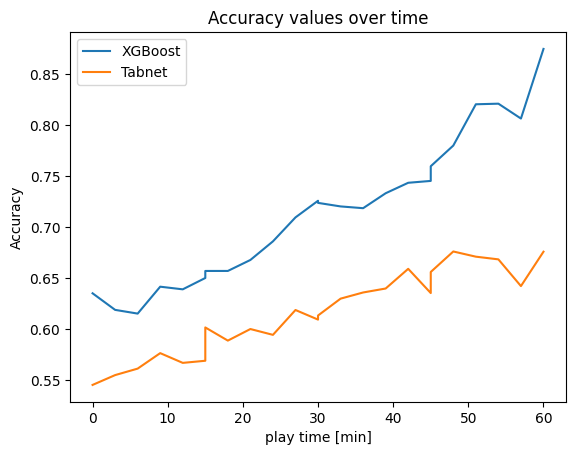

In [ ]:
import matplotlib.pyplot as plt

# Beispielwerte
x = time_plot
y_xgb = auc_values_xgb
y_tn = auc_values_tn
y_rf = auc_values_rf

# Erstellen der Liniengrafik
plt.plot(x, y_xgb, label='XGBoost')
plt.plot(x, y_tn, label='Tabnet')
plt.plot(x, y_rf, label='Random Forest')

# Achsentitel und Diagrammtitel hinzufügen
plt.xlabel('play time [min]')
plt.ylabel('Accuracy')
plt.title('Accuracy values over time')

# Legende anzeigen
plt.legend()

# Anzeigen der Grafik
plt.show()